# Instal and import the different library

In [1]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=736cc94de92394ca0552c272facfc06093945dd2b4638ac81d89e79130a04c9a
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 40.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039166 sha256=e90683a54655d5db2cf30b03a0987c32830af7ec2081a48fa44e8ea9f09e7ade
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


In [3]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.mixture import GaussianMixture

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
from imageio import imread
from time import time as timer
import os
import tarfile

import tensorflow as tf

%matplotlib inline
import umap
from matplotlib import animation
from IPython.display import HTML

from scipy.stats import entropy
from sklearn.preprocessing import StandardScaler

import plotly.express as px

import hdbscan

# Mount Goolge Drive and import dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
file_path = '/content/drive/My Drive/Module 3/dataset_final.xlsx'
df = pd.read_excel(file_path)
name_hosp = df['name_hosp']

In [6]:
file_path = '/content/drive/My Drive/Module 3/final_GMA.csv'
df = pd.read_csv(file_path)

## Final cleaning of the dataset for clustering

In [7]:
df.head()

,c_section_rate,I.1.16.M,A.5.1.F,A.7.14.M,L.6.4.F,KostAWLFA,L.5.5.F,A.7.1.F,D.2.6.P,J.1.4.M,...,"SA_MRI, CT, Lito, Dia","SA_MRI, CT, PET, Angio, Dia","SA_MRI, CT, PET, CC, Angio","SA_MRI, CT, PET, CC, Angio, Dia","SA_MRI, CT, PET, CC, LB, Angio","SA_MRI, CT, PET, CC, LB, Angio, Dia","SA_MRI, CT, PET, CC, LB, Dia","SA_MRI, CT, PET, CC, LB, Lito, Angio","SA_MRI, CT, PET, CC, LB, Lito, Angio, Dia","SA_MRI, CT, PET, CC, Lito, Angio, Dia"
0,0.537190,0.250000,0.053571,0.00000,0.000000,0.000000,0.0,0.000000,0.035714,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,0.361747,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.011236,0.000000,...,False,False,False,False,False,False,False,False,False,False
2,0.279279,0.013086,0.209378,0.02072,0.075245,32818.185387,0.0,0.876772,0.093784,0.747001,...,False,False,False,False,False,True,False,False,False,False
3,0.253731,0.000000,0.045455,0.00000,0.000000,19496.090909,0.0,0.000000,0.045455,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,0.413793,0.000000,0.000000,0.00000,0.000000,1390.923077,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


# Split the dataframe in train and test data

To standardize the values across the DataFrame before performing the split, we use the *StandardScaler* method from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

We also fill Nan value with 0

In [8]:
X = df
X = X.fillna(0)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into 80% training and 20% testing
#X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train = X

## PCA analysis

In [9]:
df_noNA = df
df_noNA = df_noNA.fillna(0)
pca=PCA()
pca.fit(df_noNA)

PCA()

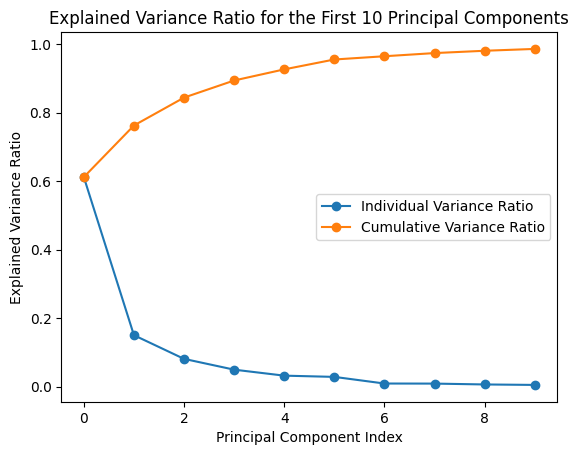

In [10]:
plt.plot(pca.explained_variance_ratio_[:10], '-o', label='Individual Variance Ratio')
plt.plot(np.cumsum(pca.explained_variance_ratio_[:10]), '-o', label='Cumulative Variance Ratio')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for the First 10 Principal Components')
plt.legend()
plt.show()

In [11]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed for 95% explained variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f"Number of components needed for 95% explained variance: {n_components_95}")

# Retrain PCA with the determined number of components
pca_95 = PCA(n_components=n_components_95)
df_noNa_pca_95 = pca_95.fit_transform(X)

Number of components needed for 95% explained variance: 6


In [12]:
df_PCA = pd.DataFrame(pca.components_[:10].transpose(),
                      columns=[f'PC_{i+1}' for i in range(10)],
                      index=df_noNA.columns)
df_PCA

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
c_section_rate,-3.855903e-09,1.805511e-07,4.480954e-08,9.836062e-08,1.630405e-07,-8.205216e-08,4.955025e-08,2.641636e-11,2.269797e-08,1.113726e-07
I.1.16.M,4.413842e-08,4.551404e-08,1.034139e-07,1.342470e-07,4.187367e-07,3.520178e-07,3.372661e-07,-3.347375e-07,1.479185e-07,-4.748559e-08
A.5.1.F,-1.403267e-07,5.893049e-07,2.241881e-07,-1.978830e-08,7.671234e-08,4.009553e-07,-4.244670e-07,-8.112248e-08,-1.129737e-06,1.064405e-07
A.7.14.M,-1.274090e-08,5.298580e-08,9.828691e-09,2.891158e-08,2.298012e-08,5.747722e-08,-2.526766e-08,3.056763e-08,-7.667404e-08,-6.614935e-08
L.6.4.F,-3.676985e-08,1.250039e-08,-2.070137e-08,3.392703e-08,-2.329187e-08,1.690219e-08,2.317554e-09,-4.177953e-08,-5.797191e-08,5.825389e-09
...,...,...,...,...,...,...,...,...,...,...
"SA_MRI, CT, PET, CC, LB, Angio, Dia",-1.180770e-07,1.747730e-08,2.590433e-07,3.739938e-07,2.395237e-07,3.386442e-07,2.698950e-08,-5.654495e-07,-5.088143e-07,-2.629368e-07
"SA_MRI, CT, PET, CC, LB, Dia",1.049168e-09,-3.174475e-08,-5.923130e-09,-3.972584e-08,-5.951019e-09,7.058085e-08,-5.604278e-08,3.695987e-08,-3.720666e-08,6.325313e-08
"SA_MRI, CT, PET, CC, LB, Lito, Angio",-8.818268e-10,6.470234e-08,7.144644e-08,-3.822290e-08,-7.034295e-08,-9.326696e-08,-1.815938e-08,1.189558e-07,5.925775e-08,-4.820687e-07
"SA_MRI, CT, PET, CC, LB, Lito, Angio, Dia",-2.244247e-07,-7.301447e-08,-1.046688e-07,-3.725422e-07,-5.686657e-07,8.522437e-08,-3.176962e-07,-2.420265e-07,-1.000402e-06,3.435574e-07


In [13]:
df_noNA.head()

,c_section_rate,I.1.16.M,A.5.1.F,A.7.14.M,L.6.4.F,KostAWLFA,L.5.5.F,A.7.1.F,D.2.6.P,J.1.4.M,...,"SA_MRI, CT, Lito, Dia","SA_MRI, CT, PET, Angio, Dia","SA_MRI, CT, PET, CC, Angio","SA_MRI, CT, PET, CC, Angio, Dia","SA_MRI, CT, PET, CC, LB, Angio","SA_MRI, CT, PET, CC, LB, Angio, Dia","SA_MRI, CT, PET, CC, LB, Dia","SA_MRI, CT, PET, CC, LB, Lito, Angio","SA_MRI, CT, PET, CC, LB, Lito, Angio, Dia","SA_MRI, CT, PET, CC, Lito, Angio, Dia"
0,0.537190,0.250000,0.053571,0.00000,0.000000,0.000000,0.0,0.000000,0.035714,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,0.361747,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.011236,0.000000,...,False,False,False,False,False,False,False,False,False,False
2,0.279279,0.013086,0.209378,0.02072,0.075245,32818.185387,0.0,0.876772,0.093784,0.747001,...,False,False,False,False,False,True,False,False,False,False
3,0.253731,0.000000,0.045455,0.00000,0.000000,19496.090909,0.0,0.000000,0.045455,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,0.413793,0.000000,0.000000,0.00000,0.000000,1390.923077,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


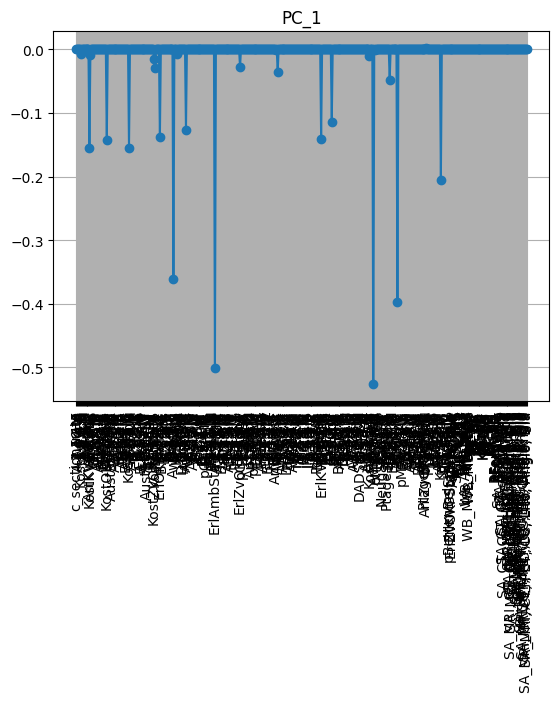

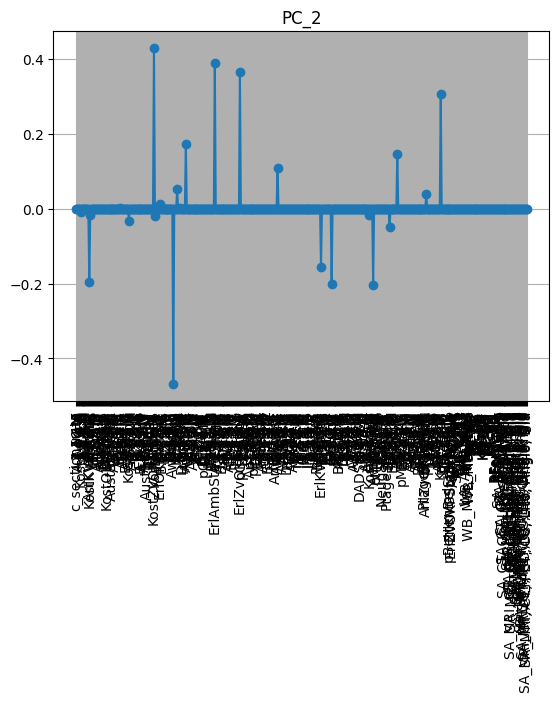

In [14]:
# Plot the first 4 principal components
for vector in df_PCA.columns[:2]:
    plt.figure()
    plt.title(vector)
    plt.plot(np.arange(len(df_noNA.columns)), list(df_PCA[vector]), '-o')
    _ = plt.xticks(np.arange(len(df_noNA.columns)), df_noNA.columns, rotation=90)
    plt.grid()

plt.show()

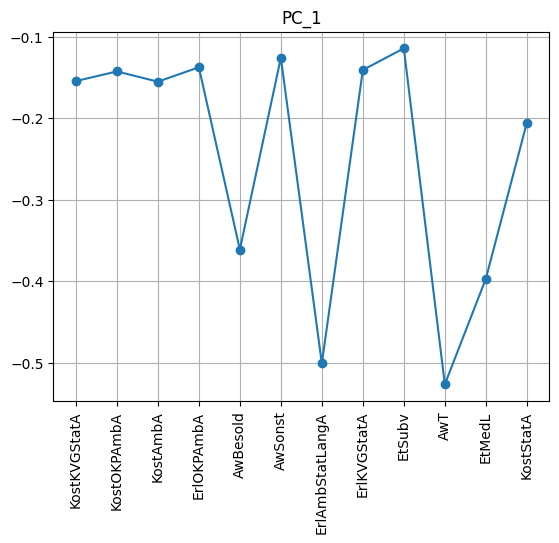

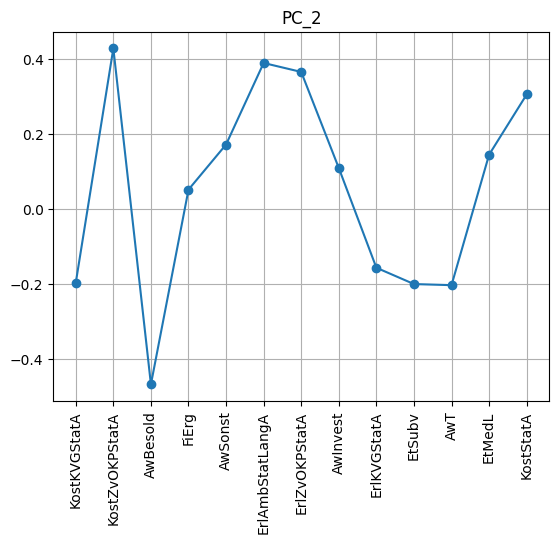

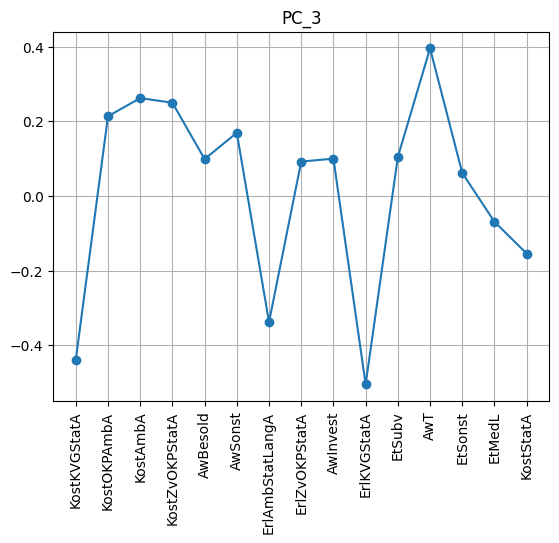

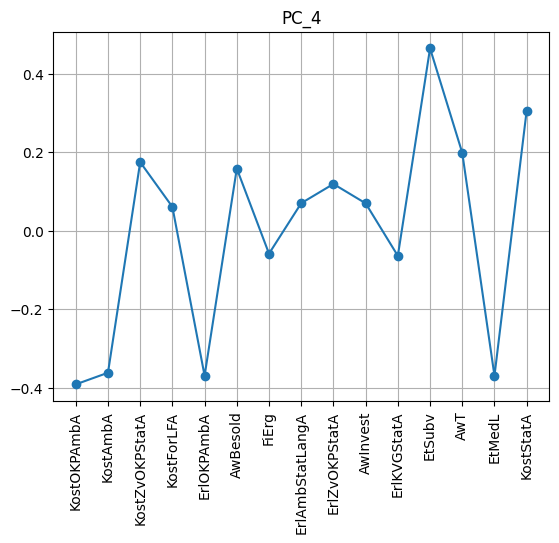

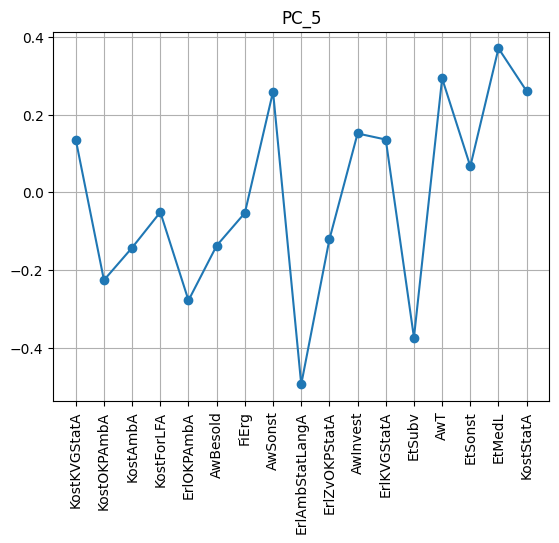

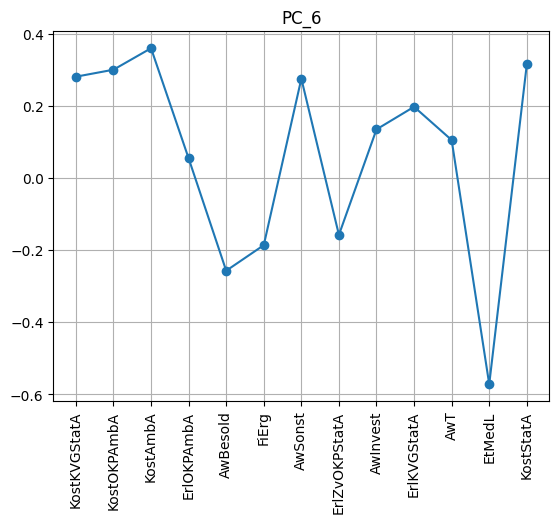

In [15]:
for vector in df_PCA.columns[:6]:
    plt.figure()
    plt.title(vector)

    # Filter variables based on the absolute value condition
    selected_variables = df_PCA.index[abs(df_PCA[vector]) > 0.05]

    # Plot only selected variables
    plt.plot(np.arange(len(selected_variables)), list(df_PCA.loc[selected_variables, vector]), '-o')

    _ = plt.xticks(np.arange(len(selected_variables)), selected_variables, rotation=90)
    plt.grid()

plt.show()

*   AWT: Corresponds to all expenses (including taxes, exceptional charges, and non-operating expenses corresponding to accounts 77 to 79 of the H+ accounting plan)
*   ErlAmbStatLangA: Total revenue, including non-case-related revenue
*   AwBesold: Employee costs
*   EtMedL: Revenue from hospitalizations and care
*   kostStatA: Total costs in the hospital sector




# Non-linear dimensionality reduction

## UMAP dimensionality reduction

### 2D Clustering

Designing a function to illustrate how different neighbor_values affect the clustering outcome.

In [16]:
def visualize_umap_with_varied_neighbors(X, neighbor_values):
    plt.figure(figsize=(15, 5 * len(neighbor_values)))

    for i, n_neighbors in enumerate(neighbor_values):
        umap_model = umap.UMAP(n_neighbors=n_neighbors, n_components=2, random_state=42)
        umap_hospital = umap_model.fit_transform(X)

        plt.subplot(len(neighbor_values), 1, i + 1)
        plt.scatter(umap_hospital[:, 0], umap_hospital[:, 1], s=10)
        plt.title(f"UMAP with n_neighbors={n_neighbors}")

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} over

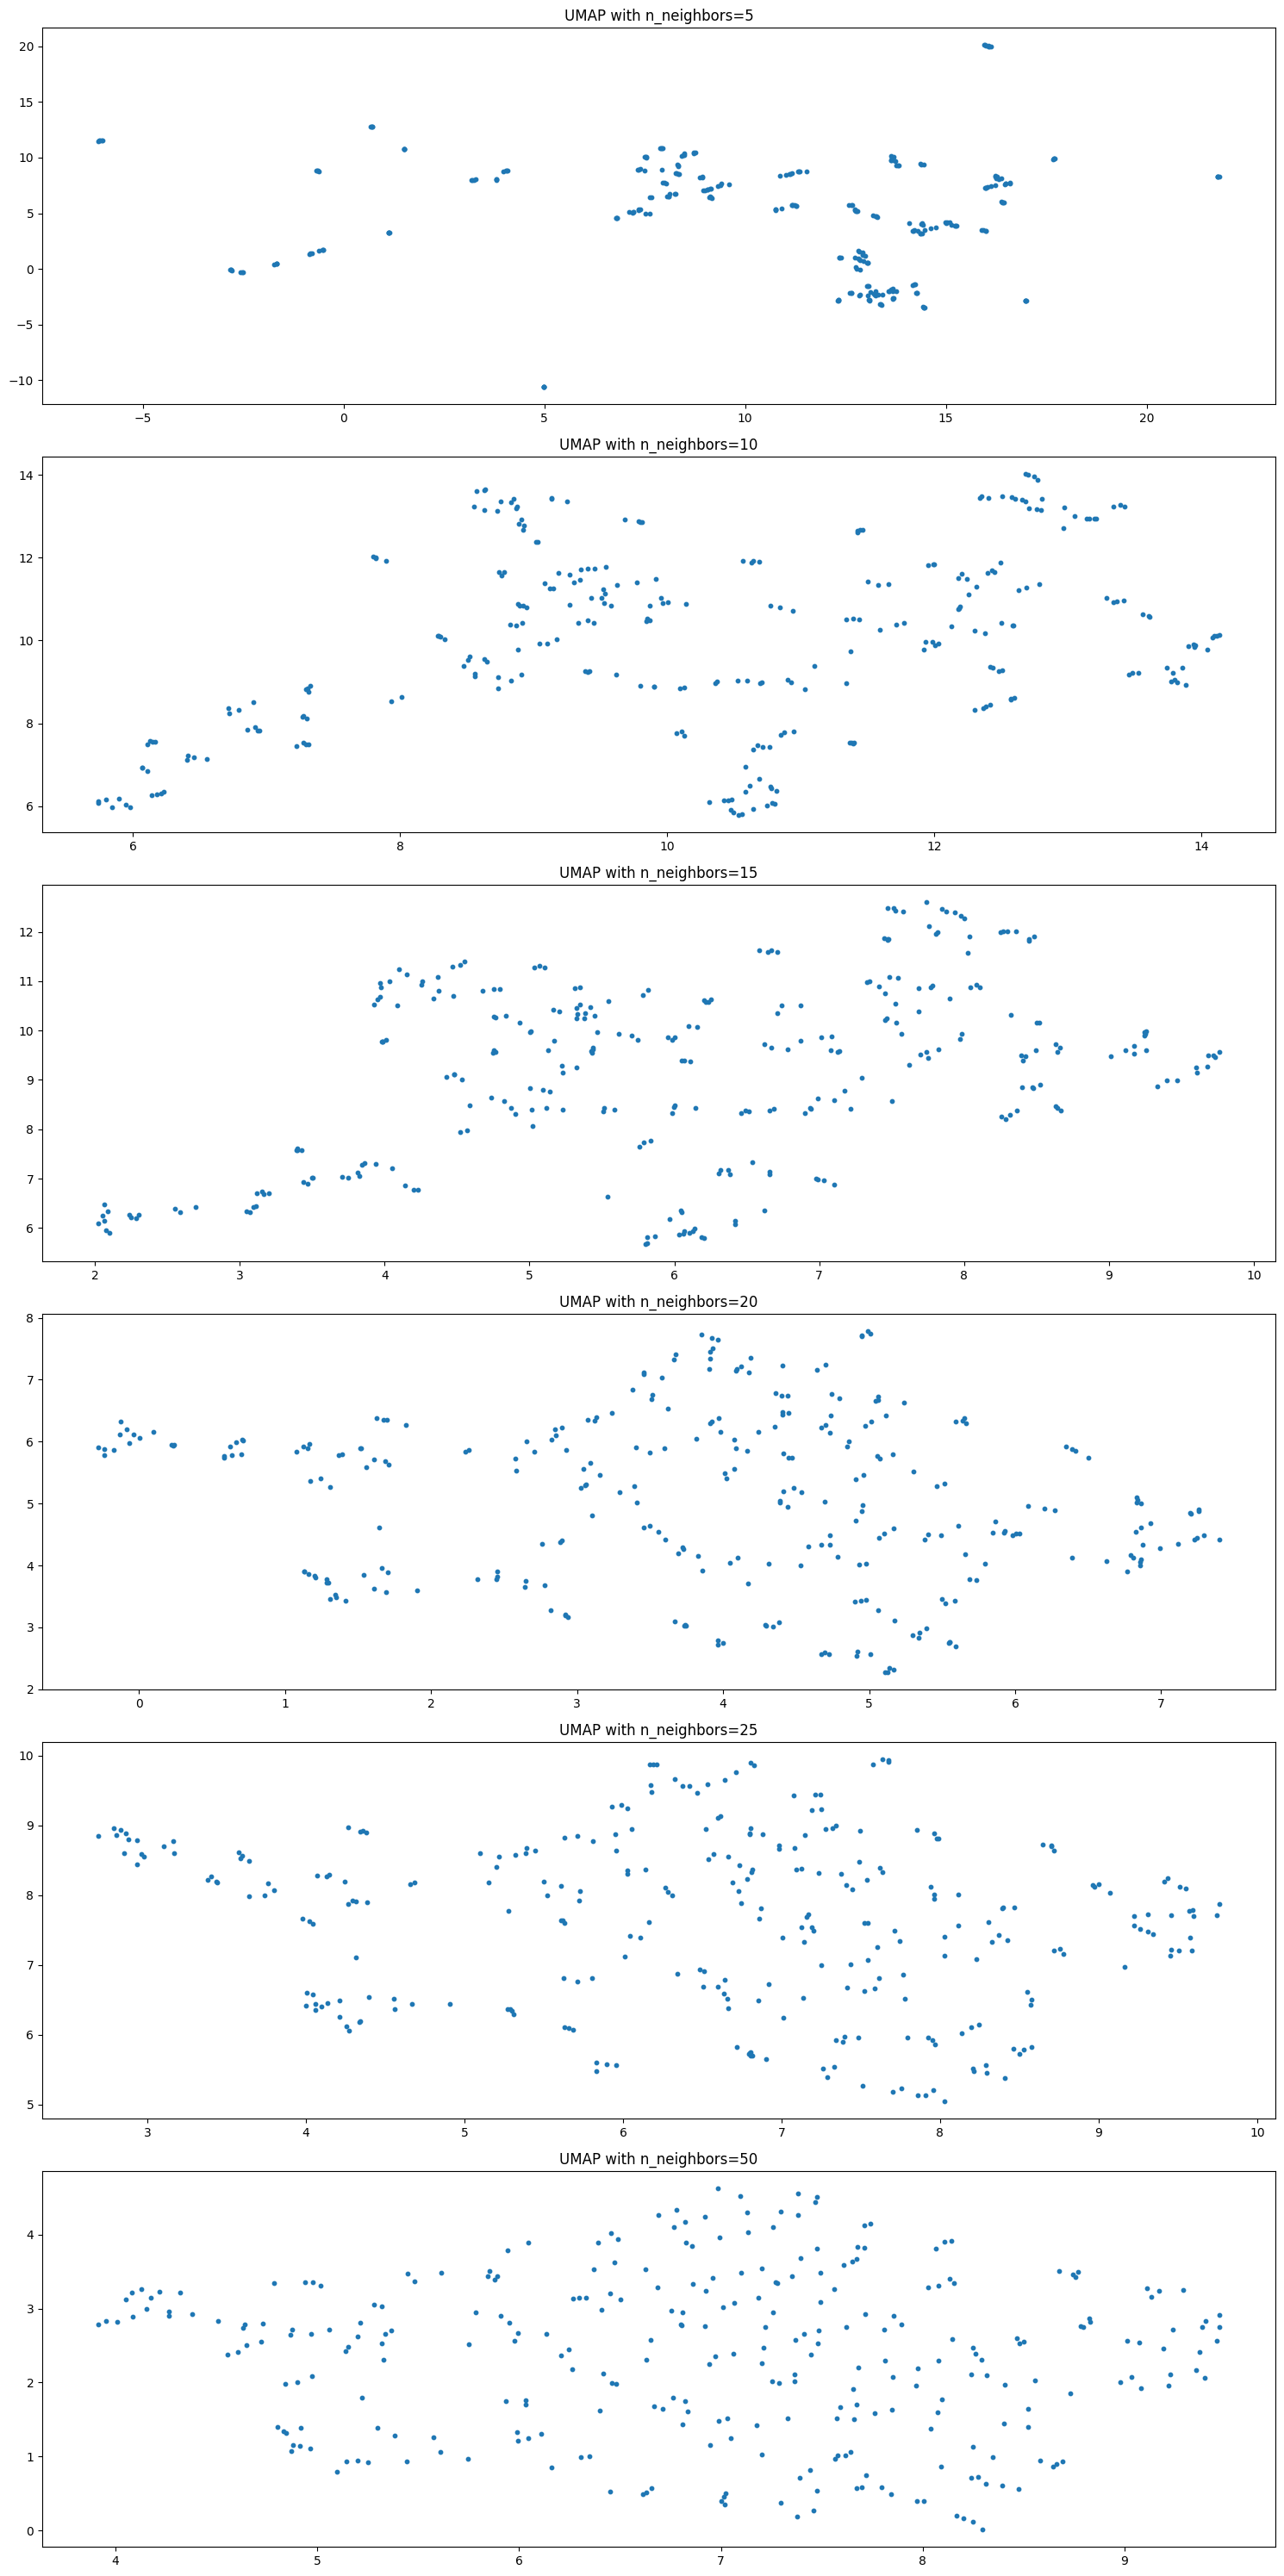

In [17]:
neighbor_values = [5,10,15,20,25,50]
visualize_umap_with_varied_neighbors(X_train, neighbor_values)

Use of 5 neighbors for further analysis

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


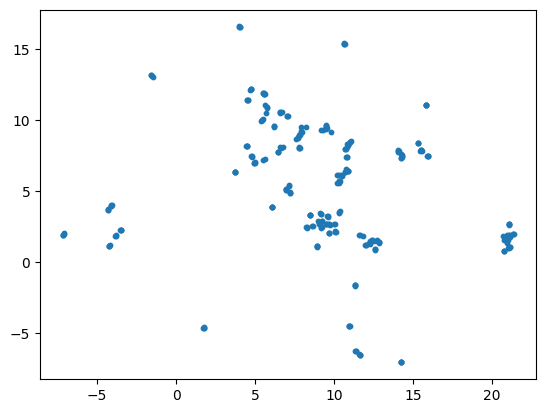

In [18]:
umap_model = umap.UMAP(n_neighbors=5, n_components=2, random_state=1711)
umap_hospital = umap_model.fit_transform(X_train)
plt.scatter(umap_hospital[:,0],umap_hospital[:,1],s=10)
plt.show()

Use of KMeans to classify the diffrent clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


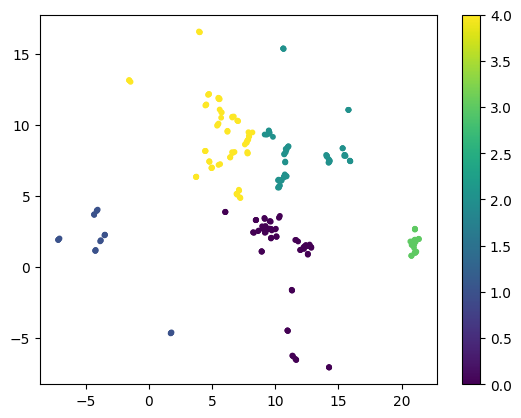

In [19]:
kmeans = KMeans(n_clusters=5, random_state=0)  # You can adjust the number of clusters as needed
kmeans.fit(umap_hospital)
cluster_labels = kmeans.labels_

# Visualizing the clusters with different colors
plt.scatter(umap_hospital[:,0], umap_hospital[:,1], c=cluster_labels, cmap='viridis', s=10)
plt.colorbar()
plt.show()

### 3D Clustering with KMeans

In [20]:
umap_model = umap.UMAP(n_neighbors=5, n_components=3, random_state=1711)
umap_hospital = umap_model.fit_transform(X_train)

# K-Means clustering on UMAP embeddings
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters (n_clusters) as needed
kmeans.fit(umap_hospital)
cluster_labels = kmeans.labels_

# Visualizing the clusters with UMAP using Plotly Express
fig = px.scatter_3d(x=umap_hospital[:, 0], y=umap_hospital[:, 1], z=umap_hospital[:, 2], color=cluster_labels)
fig.update_traces(marker=dict(size=2))
fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Convert cluster labels to strings
cluster_strings = [str(i) for i in cluster_labels]

# Create a DataFrame with UMAP embeddings and cluster labels
data = {'UMAP1': umap_hospital[:, 0], 'UMAP2': umap_hospital[:, 1], 'UMAP3': umap_hospital[:, 2], 'Cluster': cluster_strings}
df_umap_clusters = pd.DataFrame(data)

# Concatenate cluster labels with the original data
df_with_clusters = pd.concat([pd.DataFrame(X_train), df_umap_clusters], axis=1)
df_with_clusters.insert(0, 'name_Hosp', name_hosp)

# Group the DataFrame by the 'Cluster' column
grouped_df_kmeans = df_with_clusters.groupby('Cluster')


for cluster, df_cluster in grouped_df_kmeans:
    # Convert the values in the 'Cluster' column to strings
    df_cluster['Cluster'] = df_cluster['Cluster'].astype(str)

    # Specify the Excel file name for this cluster with a suffix
    excel_file_name = f'Kmean_{cluster}.xlsx'  # Add the suffix

    # Export the DataFrame to an Excel file
    df_cluster.to_excel(excel_file_name, index=False)
    print(f'Exporting K-Means Cluster {cluster} to {excel_file_name}')

Exporting K-Means Cluster 0 to Kmean_0.xlsx
Exporting K-Means Cluster 1 to Kmean_1.xlsx
Exporting K-Means Cluster 2 to Kmean_2.xlsx
Exporting K-Means Cluster 3 to Kmean_3.xlsx
Exporting K-Means Cluster 4 to Kmean_4.xlsx


### 3D Clustering with HDBSCAN

In [28]:
# HDBSCAN clustering on UMAP embeddings

clusterer = hdbscan.HDBSCAN(min_cluster_size=12)
cluster_labels = clusterer.fit_predict(umap_hospital)

# Displaying the unique cluster labels identified by HDBSCAN
unique_clusters = set(cluster_labels)
print("Unique Clusters Identified:", unique_clusters)

Unique Clusters Identified: {0, 1, 2, 3, 4, 5, -1}


In [29]:
# HDBSCAN clustering on UMAP embeddings
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(umap_hospital)

# Convert the array of integers to an array of strings
cluster_string = [str(i) for i in cluster_labels]

# Create a DataFrame with UMAP embeddings and cluster labels
data = {'UMAP1': umap_hospital[:, 0], 'UMAP2': umap_hospital[:, 1], 'UMAP3': umap_hospital[:, 2], 'Cluster': cluster_string}
df_umap_clusters = pd.DataFrame(data)

# Visualizing the clusters with UMAP using Plotly Express
fig = px.scatter_3d(df_umap_clusters, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster')
fig.update_traces(marker=dict(size=2))
fig.show()

In [30]:
# Concatenate cluster labels with the original data
df_with_clusters = pd.concat([pd.DataFrame(X_train), df_umap_clusters], axis=1)
# Ajouter la colonne au début du DataFrame df_with_clusters
df_with_clusters.insert(0, 'name_Hosp', name_hosp)

In [31]:
# Group the DataFrame by the 'Cluster' column
grouped_df = df_with_clusters.groupby('Cluster')

# Loop to export each cluster to an Excel file
for cluster, df_cluster in grouped_df:
    # Convert the values in the 'Cluster' column to strings
    df_cluster['Cluster'] = df_cluster['Cluster'].astype(str)

    # Specify the Excel file name for this cluster
    excel_file_name = f'HDBSCAN_{cluster}.xlsx'

    # Export the DataFrame to an Excel file
    df_cluster.to_excel(excel_file_name, index=False)
    print(f'Exporting Cluster {cluster} to {excel_file_name}')

Exporting Cluster -1 to HDBSCAN_-1.xlsx
Exporting Cluster 0 to HDBSCAN_0.xlsx
Exporting Cluster 1 to HDBSCAN_1.xlsx
Exporting Cluster 2 to HDBSCAN_2.xlsx
Exporting Cluster 3 to HDBSCAN_3.xlsx
Exporting Cluster 4 to HDBSCAN_4.xlsx
Exporting Cluster 5 to HDBSCAN_5.xlsx
Exporting Cluster 6 to HDBSCAN_6.xlsx


In [32]:
# Create DataFrame with UMAP embeddings, cluster labels, and hospital names
data = {'UMAP1': umap_hospital[:, 0], 'UMAP2': umap_hospital[:, 1], 'UMAP3': umap_hospital[:, 2], 'Cluster': cluster_labels, 'Name': name_hosp}
df_umap_clusters = pd.DataFrame(data)

# Visualizing the clusters with UMAP using Plotly Express
fig = px.scatter_3d(df_umap_clusters, x='UMAP1', y='UMAP2', z='UMAP3', color='Cluster', hover_data=['Name'])
fig.update_traces(marker=dict(size=3, opacity=1))
fig.update_layout(scene=dict(xaxis_title='UMAP1', yaxis_title='UMAP2', zaxis_title='UMAP3'))
fig.update_layout(showlegend=False)  # Show legend with cluster labels
fig.update_layout(scene_camera=dict(eye=dict(x=0, y=0, z=2)))  # Adjust the initial camera position

# Set mode to 'markers' and 'text' for interactive hover
fig.update_traces(mode='markers+text', textposition='bottom center')

# Enable hover on click
fig.update_layout(hovermode='closest')

fig.show()

In [ ]:
df.head

<bound method NDFrame.head of                                              name_hosp  c_section_rate  \
0                                       Andreas Klinik        0.537190   
1                                   Bethesda Spital AG        0.361747   
2        CHUV Centre Hospitalier Universitaire Vaudois        0.279279   
3    Center da Sanda Engiadina Bassa Ospidal d'Engi...        0.253731   
4     Centro Sanitario Valposchiavo Ospedale San Sisto        0.413793   
..                                                 ...             ...   
293                                Stadtspital Triemli        0.372003   
294                               Stiftung Spital Muri        0.335303   
295                           Universitätsspital Basel        0.370635   
296                          Universitätsspital Zürich        0.474082   
297                             Zuger Kantonsspital AG        0.341176   

     I.1.16.M   A.5.1.F  A.7.14.M   L.6.4.F     KostAWLFA  L.5.5.F   A.7.1.F  \
0

# Mean of C-section per cluster

In [22]:
df.insert(0, 'name_Hosp', name_hosp)

In [23]:
df.head()

,name_Hosp,c_section_rate,I.1.16.M,A.5.1.F,A.7.14.M,L.6.4.F,KostAWLFA,L.5.5.F,A.7.1.F,D.2.6.P,...,"SA_MRI, CT, Lito, Dia","SA_MRI, CT, PET, Angio, Dia","SA_MRI, CT, PET, CC, Angio","SA_MRI, CT, PET, CC, Angio, Dia","SA_MRI, CT, PET, CC, LB, Angio","SA_MRI, CT, PET, CC, LB, Angio, Dia","SA_MRI, CT, PET, CC, LB, Dia","SA_MRI, CT, PET, CC, LB, Lito, Angio","SA_MRI, CT, PET, CC, LB, Lito, Angio, Dia","SA_MRI, CT, PET, CC, Lito, Angio, Dia"
0,Andreas Klinik,0.537190,0.250000,0.053571,0.00000,0.000000,0.000000,0.0,0.000000,0.035714,...,False,False,False,False,False,False,False,False,False,False
1,Bethesda Spital AG,0.361747,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.011236,...,False,False,False,False,False,False,False,False,False,False
2,CHUV Centre Hospitalier Universitaire Vaudois,0.279279,0.013086,0.209378,0.02072,0.075245,32818.185387,0.0,0.876772,0.093784,...,False,False,False,False,False,True,False,False,False,False
3,Center da Sanda Engiadina Bassa Ospidal d'Engi...,0.253731,0.000000,0.045455,0.00000,0.000000,19496.090909,0.0,0.000000,0.045455,...,False,False,False,False,False,False,False,False,False,False
4,Centro Sanitario Valposchiavo Ospedale San Sisto,0.413793,0.000000,0.000000,0.00000,0.000000,1390.923077,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df['Cluster'] = df_with_clusters['Cluster']


In [25]:
# Assuming df has a 'Cluster' column and a 'c_section_rate' column
mean_c_section_rate_by_cluster = df.groupby('Cluster')['c_section_rate'].mean()

# Convert the result to a DataFrame if needed
mean_c_section_rate_by_cluster_df = mean_c_section_rate_by_cluster.reset_index(name='mean_c_section_rate')


In [26]:
mean_c_section_rate_by_cluster_df

,Cluster,mean_c_section_rate
0,0,0.303657
1,1,0.346073
2,2,0.350546
3,3,0.332564
4,4,0.347864


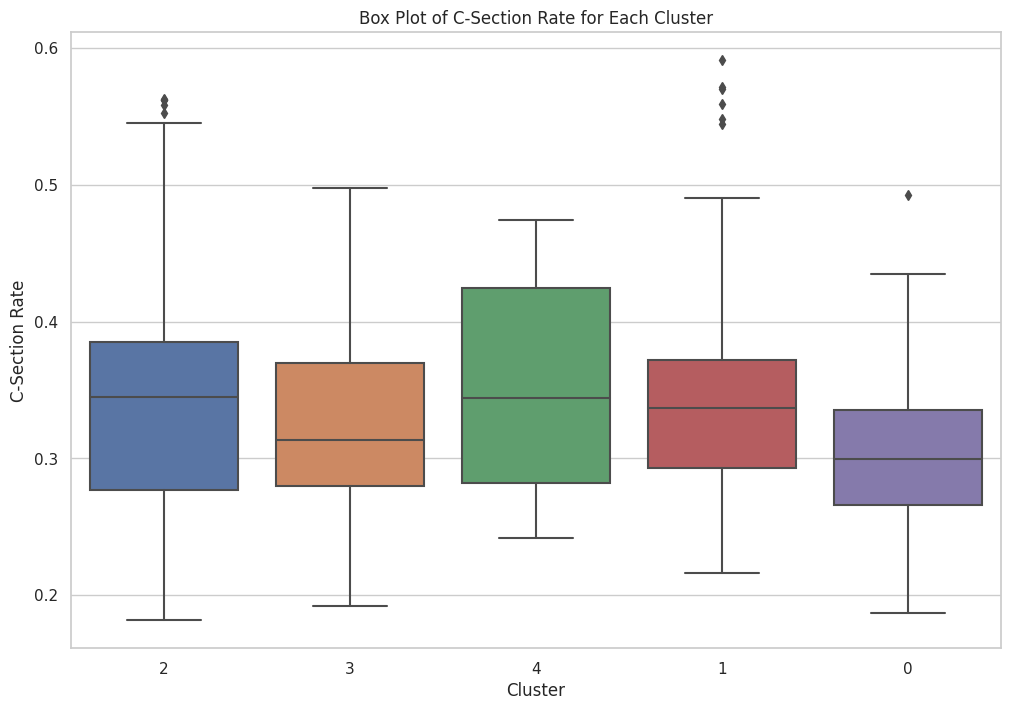

In [27]:
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='c_section_rate', data=df)

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('C-Section Rate')
plt.title('Box Plot of C-Section Rate for Each Cluster')

plt.show()

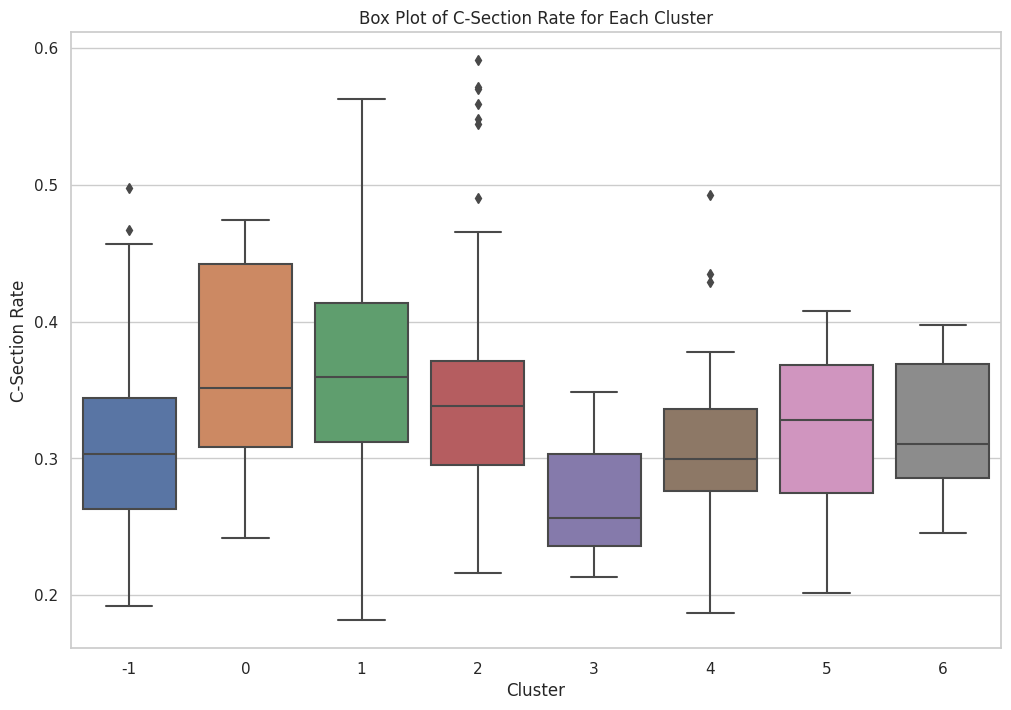

In [33]:
df['Cluster'] = df_umap_clusters['Cluster']
# Assuming df has a 'Cluster' column and a 'c_section_rate' column
mean_c_section_rate_by_cluster = df.groupby('Cluster')['c_section_rate'].mean()

# Convert the result to a DataFrame if needed
mean_c_section_rate_by_cluster_df = mean_c_section_rate_by_cluster.reset_index(name='mean_c_section_rate')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='c_section_rate', data=df)

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('C-Section Rate')
plt.title('Box Plot of C-Section Rate for Each Cluster')

plt.show()